# Import Libraries

In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from twitter_keys import *

# Setting up authorisation

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# Collecting tweets of most prominent hastag

In [3]:
tweets = tweepy.Cursor(api.search,q="#EarthDay",
                           lang="en",
                           since="2021-01-01").items(200)
list_tweets = [tweet for tweet in tweets]

# Extracting top 10 hastags from above tweets

In [4]:
htags = []

for tweet in list_tweets:
    hashtags = list(map(lambda x: x['text'].lower(), tweet.entities['hashtags']))
    htags = htags + hashtags
    
unique, counts = np.unique(htags, return_counts=True)
dict = {}

dict = {u: c for u,c in zip(unique, counts)}
dict = sorted(dict.items(), key=lambda item: item[1])
dict[-10:]

[('nature', 2),
 ('nomoreemptysummits', 2),
 ('restoretheearth', 2),
 ('leadersclimatesummit', 3),
 ('bt21', 4),
 ('gfuel', 4),
 ('happyearthday', 4),
 ('tata', 4),
 ('earthday2021', 9),
 ('earthday', 136)]

# Collecting tweets for top 10 hashtags

In [5]:
i = 1
while len(list_tweets)<2200:
    ht_str = "#" + dict[-i][0]
    if ht_str!="#earthday":
        tweets2 = tweepy.Cursor(api.search,q=ht_str,lang="en",since="2018-01-01").items(200)
        list_tweets2 = [tweet for tweet in tweets2]
        list_tweets = list_tweets + list_tweets2
    i = i+1

# Saving the tweets collected in a file

In [6]:
file = open("data_sec2.txt", "w")
for tweet in list_tweets:
    file.write(str(tweet.id))
    file.write("\n")
file.close()

# Getting number of occurences for each hashtag

In [7]:
htags = []

for tweet in list_tweets:
    hashtags = list(map(lambda x: x['text'].lower(), tweet.entities['hashtags']))
    htags = htags + hashtags
    
unique, counts = np.unique(htags, return_counts=True)
dict = {}

dict = {u: c for u,c in zip(unique, counts)}
dict = sorted(dict.items(), key=lambda item: item[1])
dict[-10:]

[('nature', 118),
 ('happyearthday', 144),
 ('earthday2021', 195),
 ('gfuel', 201),
 ('nomoreemptysummits', 303),
 ('mindthegap', 304),
 ('leadersclimatesummit', 379),
 ('tata', 390),
 ('bt21', 394),
 ('earthday', 1199)]

# Top 10 hashtags based on number of occurences

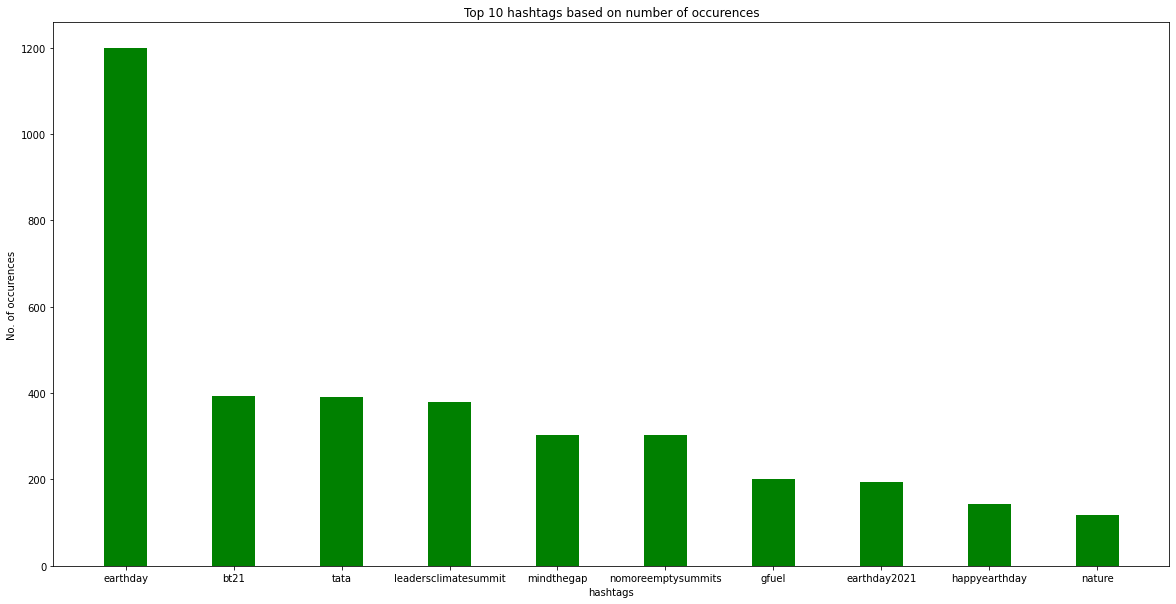

In [14]:
i=1

x_htag1 = []
y_count1 = []

while i<=10:
    x_htag1.append(dict[-i][0])
    y_count1.append(dict[-i][1])
    i = i+1

fig = plt.figure(figsize = (20, 10))
plt.bar(x_htag1, y_count1, color ='green',width = 0.4)
 
plt.xlabel("hashtags")
plt.ylabel("No. of occurences")
plt.title("Top 10 hashtags based on number of occurences")
plt.show()

# Getting number of retweets for each hashtag

In [9]:
rt_counts = []

for tweet in list_tweets:
    l = len(tweet.entities['hashtags'])
    rt_counts = rt_counts + [tweet.retweet_count]*l
    
htags = np.array(htags)
rt_counts = np.array(rt_counts)

rt_dict = {}

for i in unique:
    ind = np.where(htags==i)
    rt_dict[i] = np.sum(rt_counts[ind])
    
rt_dict_copy = rt_dict

rt_dict = sorted(rt_dict.items(), key=lambda item: item[1])
rt_dict[-10:]

[('wallpaper', 15289),
 ('warm', 15289),
 ('doometernal', 39592),
 ('gfuel', 120481),
 ('nomoreemptysummits', 1492660),
 ('mindthegap', 1492661),
 ('leadersclimatesummit', 1497825),
 ('tata', 7735615),
 ('bt21', 7761510),
 ('earthday', 9518507)]

# Top 10 hashtags based on number of retweets

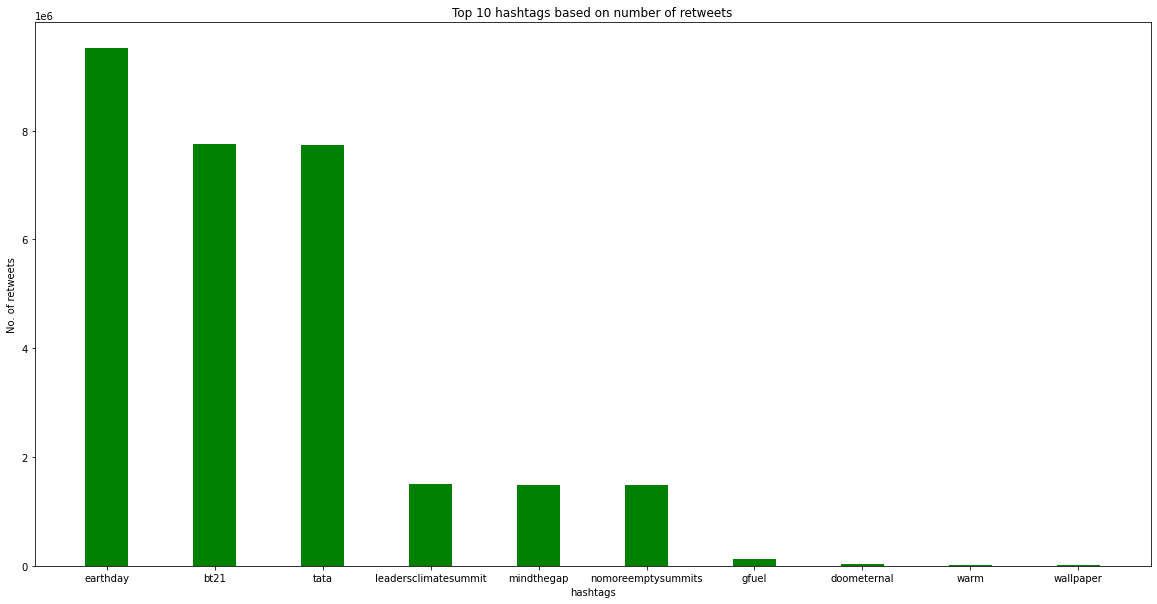

In [15]:
i=1

x_htag2 = []
y_count2 = []

while i<=10:
    x_htag2.append(rt_dict[-i][0])
    y_count2.append(rt_dict[-i][1])
    i = i+1

fig = plt.figure(figsize = (20, 10))
plt.bar(x_htag2, y_count2, color ='green',width = 0.4)
 
plt.xlabel("hashtags")
plt.ylabel("No. of retweets")
plt.title("Top 10 hashtags based on number of retweets")
plt.show()

# Getting number of likes for each hashtag

In [11]:
l_counts = []

for tweet in list_tweets:
    l = len(tweet.entities['hashtags'])
    l_counts = l_counts + [tweet.favorite_count]*l
    
l_counts = np.array(l_counts)

l_dict = {}

for i in unique:
    ind = np.where(htags==i)
    l_dict[i] = np.sum(l_counts[ind])

l_dict = sorted(l_dict.items(), key=lambda item: item[1])
l_dict[-10:]

[('earthdayeveryday', 6),
 ('aspire', 7),
 ('forest', 9),
 ('photography', 11),
 ('earthday2021', 22),
 ('leadersclimatesummit', 31),
 ('nature', 39),
 ('restoretheearth', 39),
 ('earthday', 102),
 ('happyearthday', 134)]

# Top 10 hashtags based on number of likes

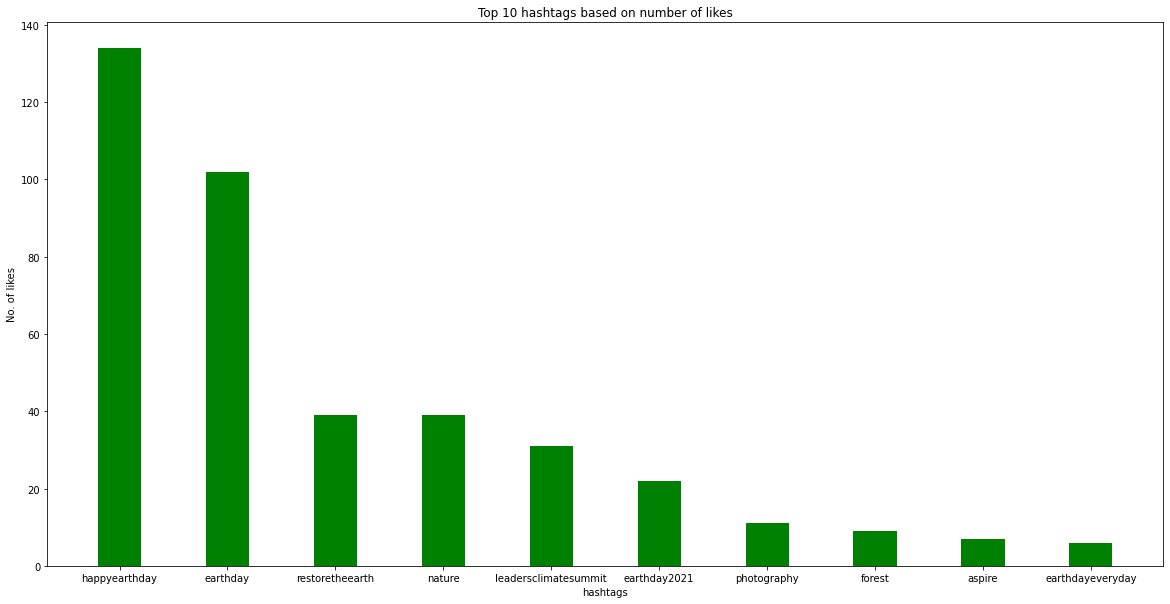

In [16]:
i=1

x_htag3 = []
y_count3 = []

while i<=10:
    x_htag3.append(l_dict[-i][0])
    y_count3.append(l_dict[-i][1])
    i = i+1

fig = plt.figure(figsize = (20, 10))
plt.bar(x_htag3, y_count3, color ='green',width = 0.4)
 
plt.xlabel("hashtags")
plt.ylabel("No. of likes")
plt.title("Top 10 hashtags based on number of likes")
plt.show()

# Calculating coefficient of traffic manipulation

In [13]:
temp = list(map(lambda x: x.retweet_count, list_tweets))
rt_total = np.sum(np.array(temp))

user_list = []

for tweet in list_tweets:
    l = len(tweet.entities['hashtags'])
    user_list = user_list + [tweet.user.screen_name]*l

user_list = np.array(user_list)

handles, h_counts = np.unique(user_list, return_counts=True)

udict = {}

udict = {u: c for u,c in zip(handles, h_counts)}
udict = sorted(udict.items(), key=lambda item: item[1])
udict = udict[-50:]
udict = np.array(udict)[:, 0]

print("Top 10 hashtags based on number of occurences")

for i in x_htag1:
    ind = np.where(htags==i)
    t = user_list[ind]
    tt = list(filter(lambda x: x in udict, t))
    ind = np.where(unique==i)
    uniq_users = len(np.unique(t))
    R = rt_dict_copy[i]
    F = (len(tt)/counts[ind])*100
    U = counts[ind]/uniq_users
    print("Hashtag:", i, "CTM:", (R/10 + F + U))
    
print("\n")
    
print("Top 10 hashtags based on number of retweets")

for i in x_htag2:
    ind = np.where(htags==i)
    t = user_list[ind]
    tt = list(filter(lambda x: x in udict, t))
    ind = np.where(unique==i)
    uniq_users = len(np.unique(t))
    R = rt_dict_copy[i]
    F = (len(tt)/counts[ind])*100
    U = counts[ind]/uniq_users
    print("Hashtag:", i, "CTM:", (R/10 + F + U))
    
print("\n")
    
print("Top 10 hashtags based on number of likes")

for i in x_htag1:
    ind = np.where(htags==i)
    t = user_list[ind]
    tt = list(filter(lambda x: x in udict, t))
    ind = np.where(unique==i)
    uniq_users = len(np.unique(t))
    R = rt_dict_copy[i]
    F = (len(tt)/counts[ind])*100
    U = counts[ind]/uniq_users
    print("Hashtag:", i, "CTM:", (R/10 + F + U))

Top 10 hashtags based on number of occurences
Hashtag: earthday CTM: [951863.45171632]
Hashtag: bt21 CTM: [776153.66480296]
Hashtag: tata CTM: [773563.92458522]
Hashtag: leadersclimatesummit CTM: [149814.05386384]
Hashtag: mindthegap CTM: [149304.88807391]
Hashtag: nomoreemptysummits CTM: [149304.91405023]
Hashtag: gfuel CTM: [12050.2435963]
Hashtag: earthday2021 CTM: [218.3618007]
Hashtag: happyearthday CTM: [325.97991453]
Hashtag: nature CTM: [575.8142764]


Top 10 hashtags based on number of retweets
Hashtag: earthday CTM: [951863.45171632]
Hashtag: bt21 CTM: [776153.66480296]
Hashtag: tata CTM: [773563.92458522]
Hashtag: leadersclimatesummit CTM: [149814.05386384]
Hashtag: mindthegap CTM: [149304.88807391]
Hashtag: nomoreemptysummits CTM: [149304.91405023]
Hashtag: gfuel CTM: [12050.2435963]
Hashtag: doometernal CTM: [3960.2]
Hashtag: warm CTM: [1629.9]
Hashtag: wallpaper CTM: [1629.9]


Top 10 hashtags based on number of likes
Hashtag: earthday CTM: [951863.45171632]
Hashtag: bt21